## CREDIT CARD FRAUD DETECTION

### Project Description:

The objective of this project is to build and train a machine learning model based on supervised machine learning algorithms and classify transactions as fraudulent or legitimate

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\card_transdata.csv')

### Exploratory Data Analysis

In [3]:
#view the first few entries

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


About the Dataset:
    
The dataset consist of 1000000 datapoints with eight columns.

1. distance_from_home : The distance from home where the transaction happened.
2. distance_from_last_transaction : The distance from last transation of the person.
3. ratio_to_median_purchase_price : Ratio of purchased price transaction to median purchase price.
4. repeat_retailer : Is the transaction is from same retailer?
5. used_chip : Is the transaction done with credit card?
6. used_pin_number : Is the transaction done with PIN number?
7. online_order : Is the transaction is online?
8. fraud : Is the transaction is fraudulent or not? (Target Variable)
    
    0 --> Not Fraud
    
    1 --> Fraud

In [4]:
#Print the number of rows and columns of the dataset

df.shape

(1000000, 8)

The datasets contains 1000000 Rows and 8 Columns

In [5]:
## Checking the datatypes of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
#statistical analysis

df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


From the table we can analyze that,

1.All continuous attributes have relatively high maximum values

2.The number of fraudulent transactions are relatively low.

In [7]:
# check for null values

df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no Missing values in the data

### Data Visualization

<Axes: xlabel='fraud', ylabel='count'>

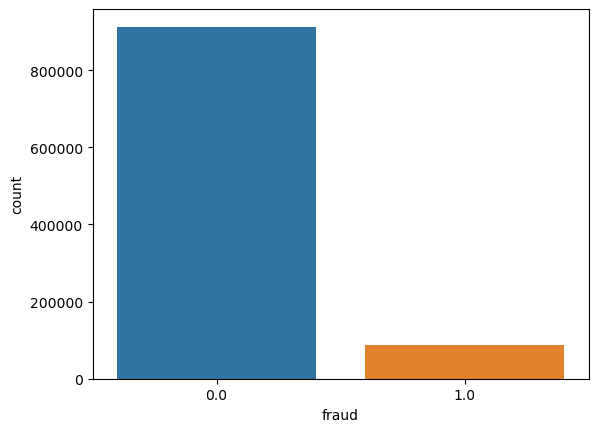

In [8]:
sns.countplot(x=df['fraud'])

The number of fraudulent transactions are relatively low compared to legit transactions

So,we can analyze that the 'fraud' class is highly imbalanced

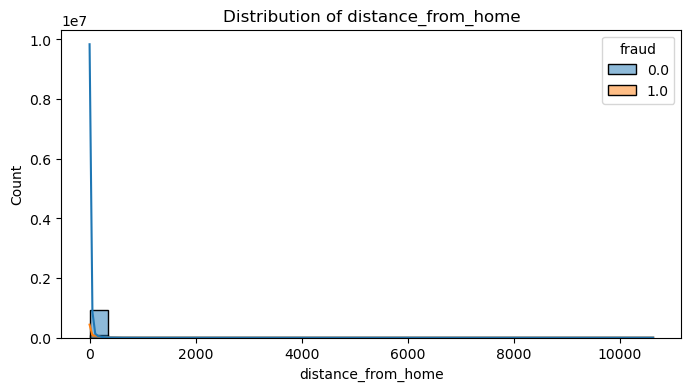

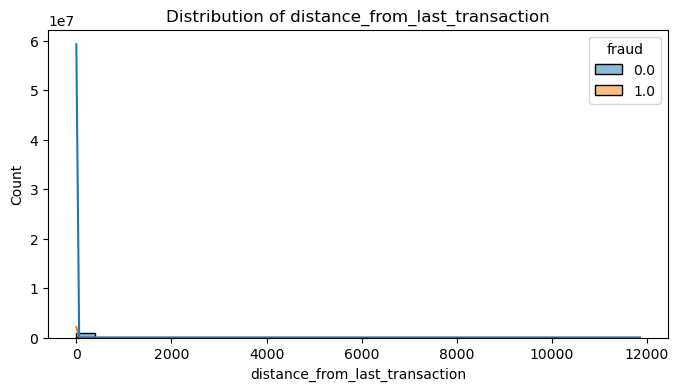

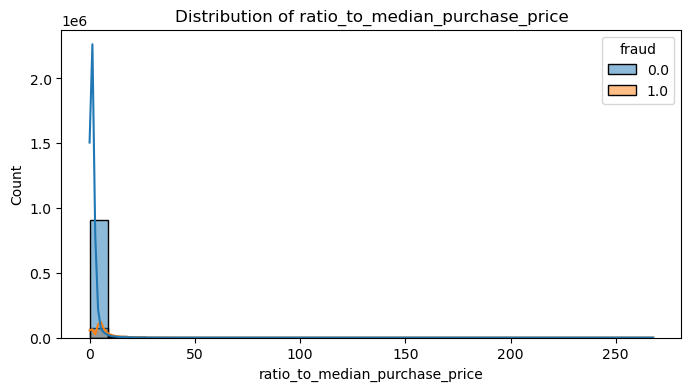

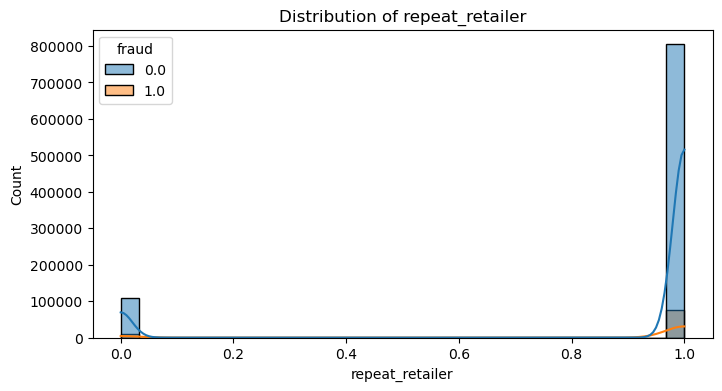

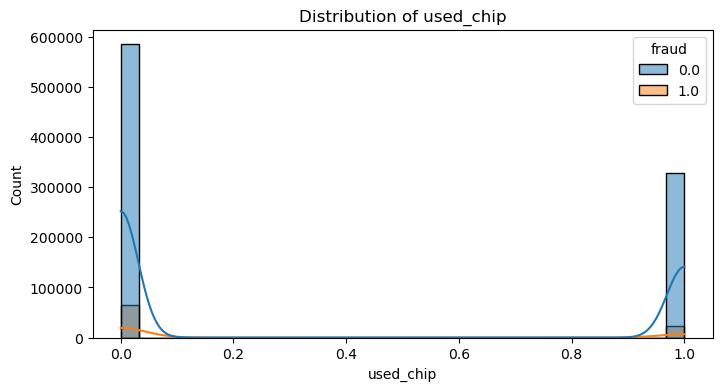

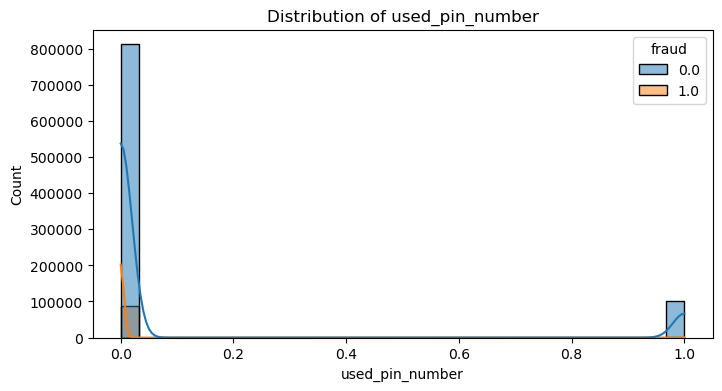

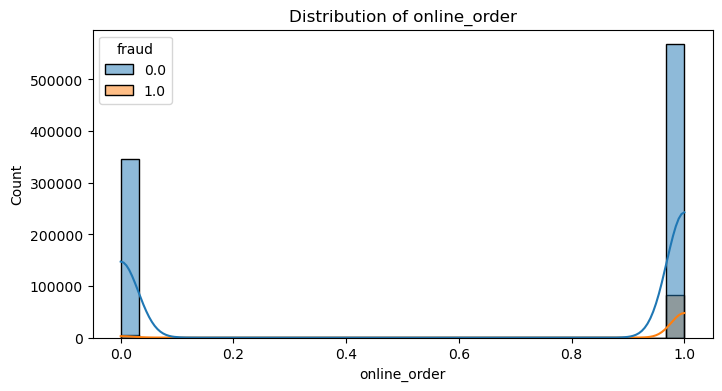

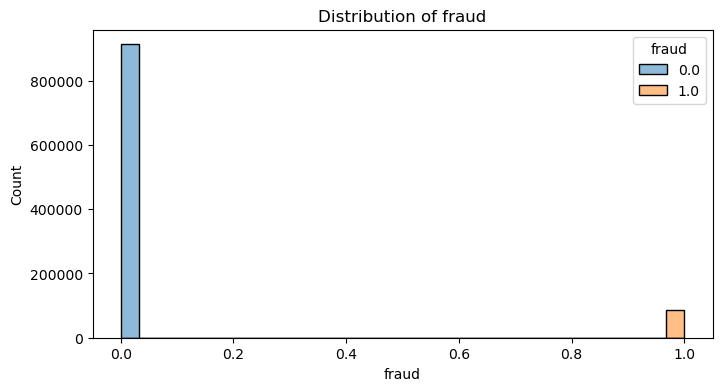

In [9]:
# Distribution of Numeric variables

numeric_cols = df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='fraud', bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Checking for outliers

Outliers are datapoints that are significaltly different from rest of the dataset. Here Boxplot is used to visualize outliers.

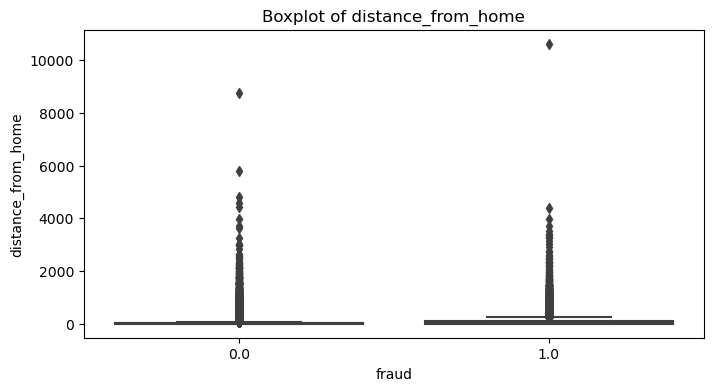

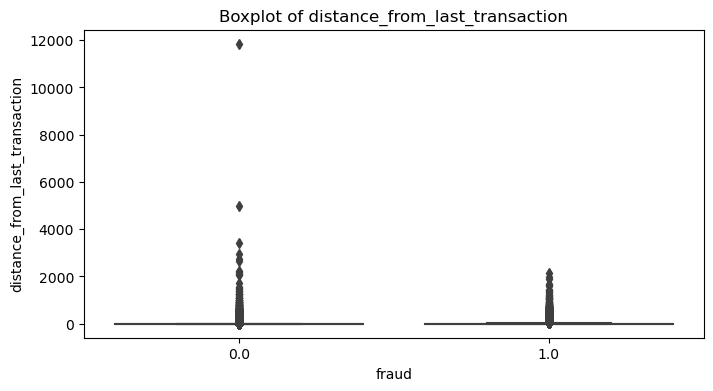

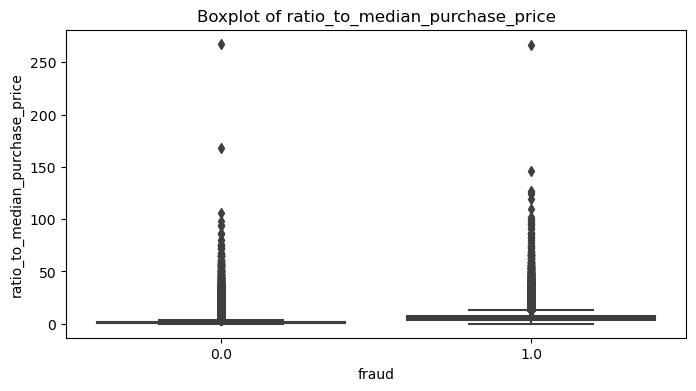

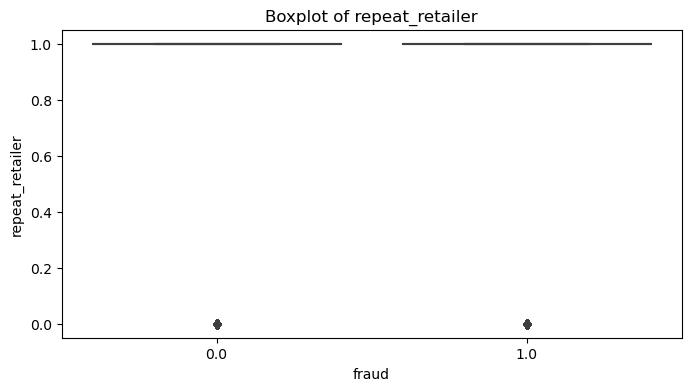

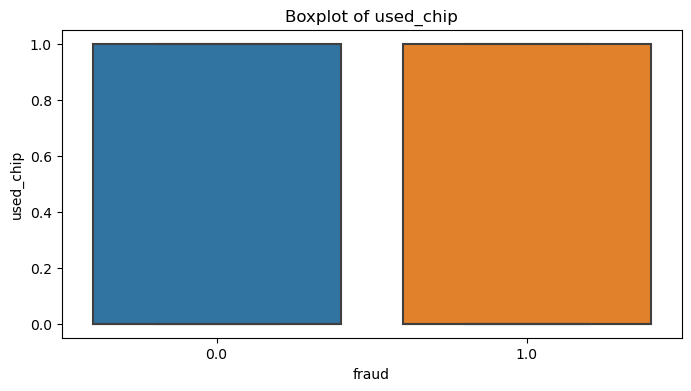

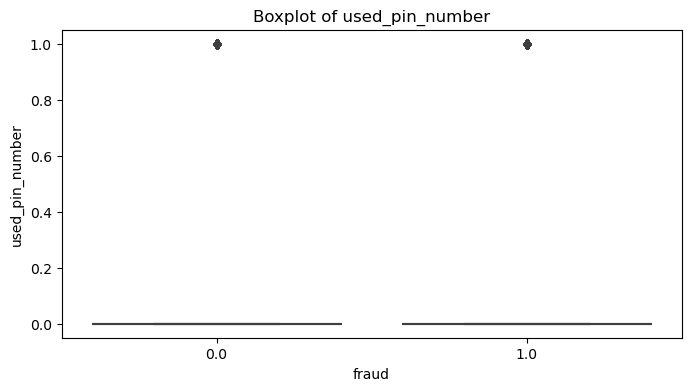

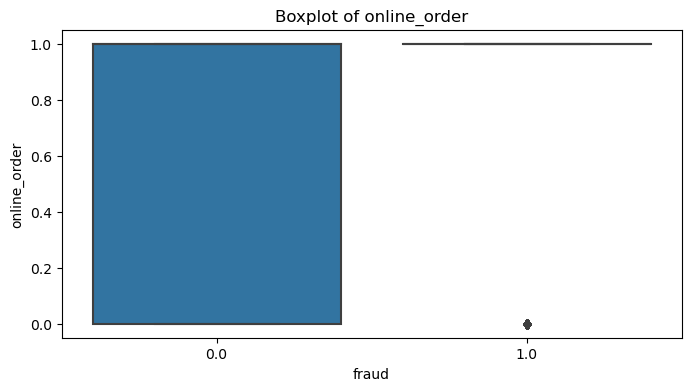

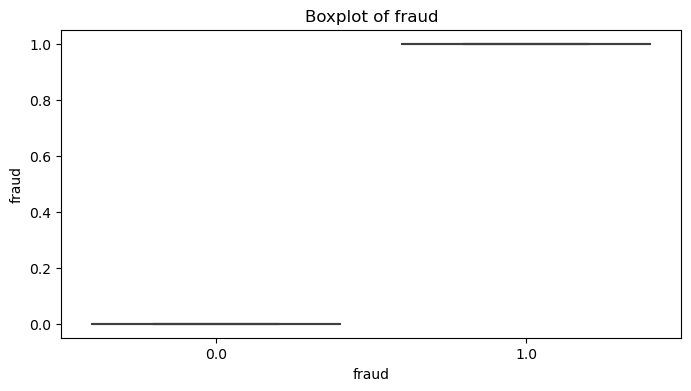

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col, x='fraud') 
    plt.title(f'Boxplot of {col}')
    plt.show()

Outliers in continuous attributes:

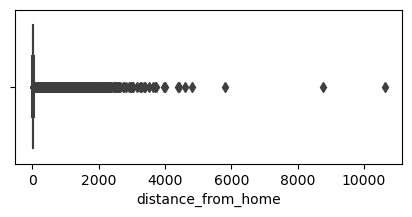

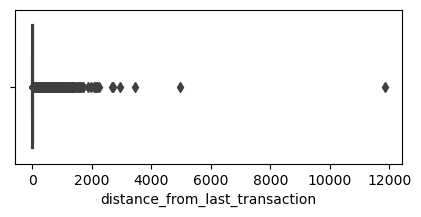

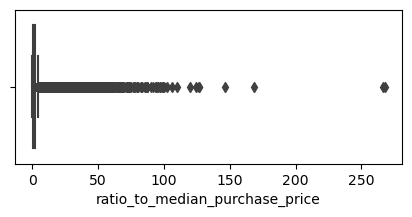

In [11]:
col = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price"]
for n in col:
    plt.figure(figsize=(5, 2))
    sns.boxplot(data=df,x=n)
    plt.show()

Outliers in discrete attributes:

In [12]:
print(df["repeat_retailer"].value_counts())
print(df["used_chip"].value_counts())
print(df["used_pin_number"].value_counts())
print(df["online_order"].value_counts())
print(df["fraud"].value_counts())

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64
0.0    649601
1.0    350399
Name: used_chip, dtype: int64
0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64
1.0    650552
0.0    349448
Name: online_order, dtype: int64
0.0    912597
1.0     87403
Name: fraud, dtype: int64


### Correlation Heatmap

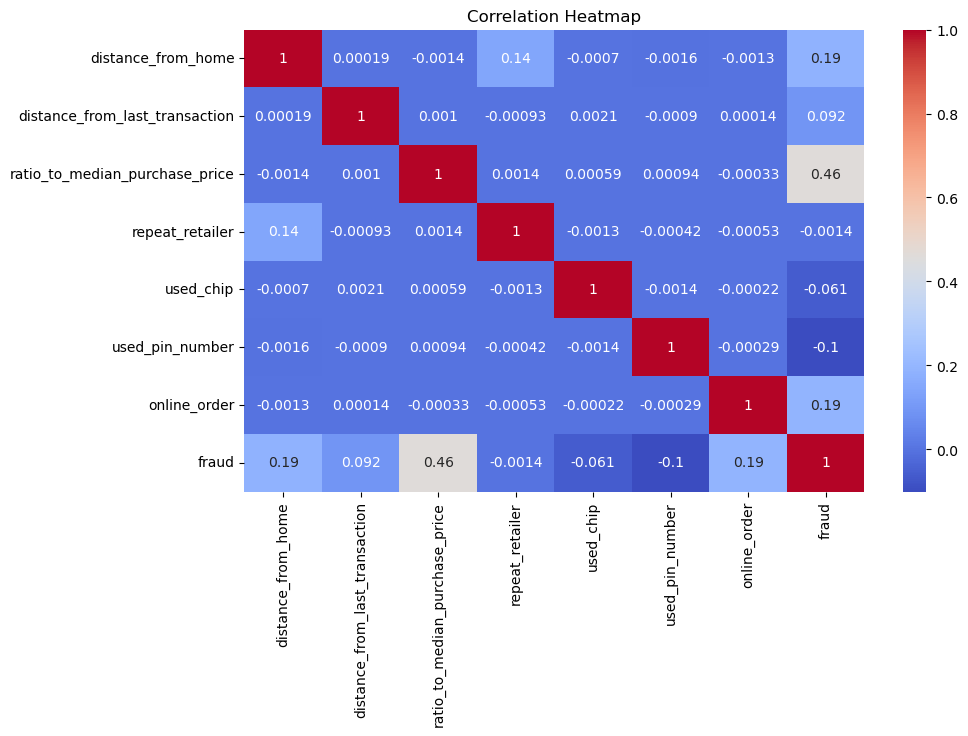

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

conclusions:

1.The attribute 'ratio_to_median_purchase_price' has the greatest correlation value with respect to fraud followed by 'distance_from_home' and 'online_order'.

2.The dataset is moderately imbalancced.

3.Dataset contains more outliers

### Data Preprocessing

In [14]:
#Creating dataframe for features
X = df.iloc[:,:-1].values

#Creating dataframe for target
y = df['fraud']

In [15]:
print(X.shape,y.shape)

(1000000, 7) (1000000,)


In [20]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700000, 7) (300000, 7) (700000,) (300000,)


Here data is standardised to two sets.train and test data.Train data is used to train the model, while the test data is used to test the model that we have made. The model will be tested to predict test data. Prediction results and actual data from test data will be compared to validate model performance.

### Feature Scaling

In [21]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building and Evaluation

Using three models for classification of fraudulent and non-fraudulent transactions:

1. Random Forest

2. Decision Tree

3. Logistic Regression

### Random Forest Classifier

 "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [22]:
# Create Random forest classifier
rf_model = RandomForestClassifier()

# train the model using the training sets
rf_model.fit(X_train_scaled, y_train)

# make predictions on the testing set
rf_pred = rf_model.predict(X_test_scaled)

In [23]:
# evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Confusion Matrix:
[[273871      0]
 [     2  26127]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



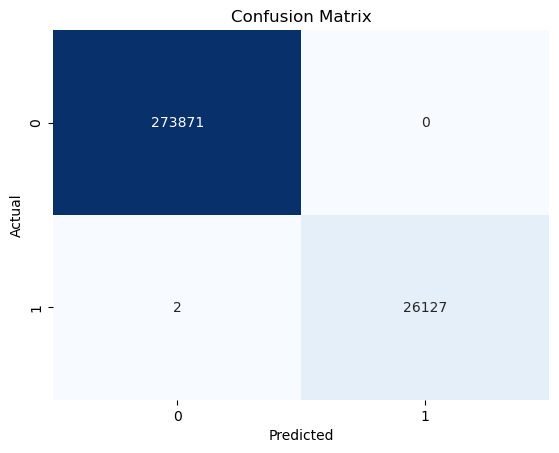

In [24]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier

A Decision Tree Classifier functions by breaking down a dataset into smaller and smaller subsets based on different criteria. Different sorting criteria will be used to divide the dataset, with the number of examples getting smaller with every division.

Once the network has divided the data down to one example, the example will be put into a class that corresponds to a key. 

In [25]:
from sklearn.tree import DecisionTreeClassifier

# create decision tree classifier object
# model_name = classifierAlgorithm(parameters)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf =  clf.fit(X_train_scaled,y_train)

# make predictions on the testing set
dt_pred = clf.predict(X_test_scaled)

In [26]:
# evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
conf_matrix2 = confusion_matrix(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[273871      0]
 [     2  26127]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99    273871
         1.0       0.85      0.91      0.88     26129

    accuracy                           0.98    300000
   macro avg       0.92      0.95      0.93    300000
weighted avg       0.98      0.98      0.98    300000



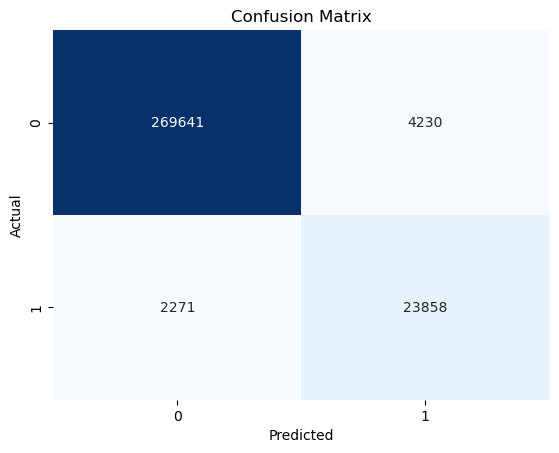

In [27]:
# Plot the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

Logistic Regression outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

In [29]:
from sklearn.linear_model import LogisticRegression

# create Logistic regression classifier object
# model_name = classifierAlgorithm(parameters)

# Logistic Regression on the reduced-dimensional data
clf = LogisticRegression(solver='liblinear')

# Train Logistic Regression Classifier
clf =  clf.fit(X_train_scaled,y_train)

# make predictions on the testing set
lr_pred = clf.predict(X_test_scaled)

In [30]:
# evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
conf_matrix3 = confusion_matrix(y_test, lr_pred)
classification_rep = classification_report(y_test, lr_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix3)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.96
Confusion Matrix:
[[271911   1960]
 [ 10460  15669]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



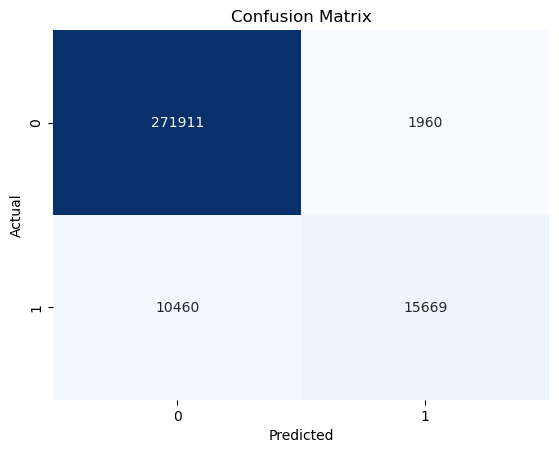

In [31]:
# Plot the confusion matrix

# Confusion Matrix and Classification Report give more details about performance
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

From these 3 models we can analyze that,

1. The models with best performance is with Random forest

2. Decision Trees and Random Forests were the ones we predicted would have the best performance due to their tendency to behave well with imbalanced data sets

3. So, here we can use Random forest classifier for predicting the fraud transactions.